# Загрузка данных

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков

labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

#### Нормировка данных

In [2]:
from sklearn import preprocessing

data = preprocessing.minmax_scale(data)

#### Диаграммы рассеяния

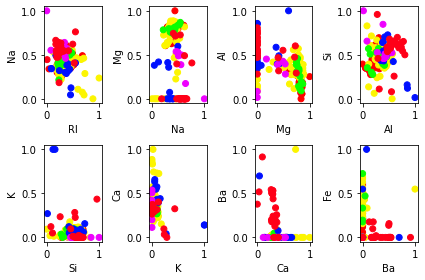

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,4)

for i in range(data.shape[1]-1): 
   axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv')
       
   axs[i // 4, i % 4].set_xlabel(var_names[i])
   axs[i // 4, i % 4].set_ylabel(var_names[i+1])

plt.tight_layout() # чтобы названия осей не перекрывались
plt.show()

Чтобы определить каким цветам соответствуют метки, запустим следующий код, который поставит в соответствие метки по оси Х и У цвет метки на графике:

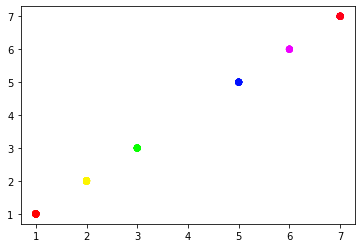

In [4]:
x = labels
y = x
t = x
plt.scatter(x, y, c=t, cmap='hsv')
plt.show()

Видим, что метке 1 и 7 соответсвует один цвет метки.

# Метод главных компонент

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

Диаграмма расеяния для двух признаков:

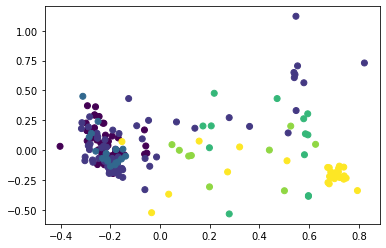

In [6]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='viridis') # заменили cmap, чтобы отображать все 6 признаков

plt.show()

In [7]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


### Обоснование результатов:

Процент объясненной дисперсии для двух компонент соответсвенно: 45% и 20%, что не является хорошим результатом. Попробуем изменить число компонент, чтобы выбрать наилучший результат по объясненной дисперсии.

Также получившийся график выглядит довольно хаотично, нельзя сказать, что после понижения размерности до двух удалось добиться линейного разделения классов.

### Изменение количества компонент:

In [8]:
def get_variance(n, svd='auto'):
  pca = PCA(n_components=n, svd_solver=svd)
  pca_data = pca.fit(data).transform(data)

  print('\nnumber of components: ', n, 'sum of explained variance ratio: ', pca.explained_variance_ratio_.sum())
  print('eigenvalues: ', pca.singular_values_)

In [9]:
for i in range(1, 10):
  get_variance(i)


number of components:  1 sum of explained variance ratio:  0.45429568907468526
eigenvalues:  [5.1049308]

number of components:  2 sum of explained variance ratio:  0.634196662104278
eigenvalues:  [5.1049308  3.21245688]

number of components:  3 sum of explained variance ratio:  0.7606912558548664
eigenvalues:  [5.1049308  3.21245688 2.69374532]

number of components:  4 sum of explained variance ratio:  0.8586697305102718
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507 ]

number of components:  5 sum of explained variance ratio:  0.9272937149511479
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697]

number of components:  6 sum of explained variance ratio:  0.9694347221994033
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454]

number of components:  7 sum of explained variance ratio:  0.9955326243472864
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459]

number of components:  8 s

Начиная с числа компонент 4, видим процент объясненной дисперсии более 85%.

Также видим 2 собственных числа, близких к нулю, для разбиения на 9 компонент. Это говорит о том, что от признаков, соответствующих этим собственным числам, можно избавиться. Действительно, для 7 компонет наблюдаем достаточно выской процент объясненной дисперсии: 99.6%.

### Восстановление данных:

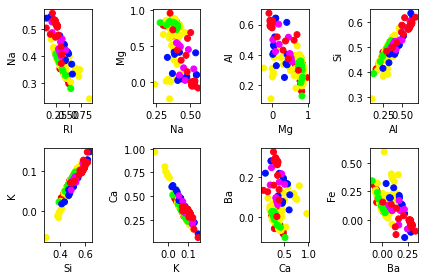

In [10]:
pca_orig = pca.inverse_transform(pca_data)

fig, axs = plt.subplots(2,4)

for i in range(data.shape[1]-1): 
   axs[i // 4, i % 4].scatter(pca_orig[:,i],pca_orig[:,(i+1)],c=labels,cmap='hsv')
       
   axs[i // 4, i % 4].set_xlabel(var_names[i])
   axs[i // 4, i % 4].set_ylabel(var_names[i+1])

plt.tight_layout() # чтобы названия осей не перекрывались
plt.show()

Видим, что восстановление данных происходит со значительной потерей информации (что логично, так как в исходных двух компонентах доля объясненной дисперсии всего 65%). Видим, что некоторым парам признаков в соответсвие была поставлена некоторая линейная зависимость, которая плохо разделяет классы.

### Параметры svd_solver:

In [11]:
for i in range(1, 10):
  get_variance(i, 'full')


number of components:  1 sum of explained variance ratio:  0.45429568907468526
eigenvalues:  [5.1049308]

number of components:  2 sum of explained variance ratio:  0.634196662104278
eigenvalues:  [5.1049308  3.21245688]

number of components:  3 sum of explained variance ratio:  0.7606912558548664
eigenvalues:  [5.1049308  3.21245688 2.69374532]

number of components:  4 sum of explained variance ratio:  0.8586697305102718
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507 ]

number of components:  5 sum of explained variance ratio:  0.9272937149511479
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697]

number of components:  6 sum of explained variance ratio:  0.9694347221994033
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454]

number of components:  7 sum of explained variance ratio:  0.9955326243472864
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459]

number of components:  8 s

In [12]:
for i in range(1, 9):
  get_variance(i, 'arpack')


number of components:  1 sum of explained variance ratio:  0.4542956890746853
eigenvalues:  [5.1049308]

number of components:  2 sum of explained variance ratio:  0.634196662104278
eigenvalues:  [5.1049308  3.21245688]

number of components:  3 sum of explained variance ratio:  0.7606912558548662
eigenvalues:  [5.1049308  3.21245688 2.69374532]

number of components:  4 sum of explained variance ratio:  0.8586697305102715
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507 ]

number of components:  5 sum of explained variance ratio:  0.9272937149511478
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697]

number of components:  6 sum of explained variance ratio:  0.9694347221994032
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454]

number of components:  7 sum of explained variance ratio:  0.9955326243472863
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459]

number of components:  8 su

In [13]:
for i in range(1, 10):
  get_variance(i, 'randomized')


number of components:  1 sum of explained variance ratio:  0.45429568907468515
eigenvalues:  [5.1049308]

number of components:  2 sum of explained variance ratio:  0.634196662104278
eigenvalues:  [5.1049308  3.21245688]

number of components:  3 sum of explained variance ratio:  0.7606912558548661
eigenvalues:  [5.1049308  3.21245688 2.69374532]

number of components:  4 sum of explained variance ratio:  0.8586697305102718
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507 ]

number of components:  5 sum of explained variance ratio:  0.9272937149511475
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697]

number of components:  6 sum of explained variance ratio:  0.9694347221994033
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454]

number of components:  7 sum of explained variance ratio:  0.9955326243472864
eigenvalues:  [5.1049308  3.21245688 2.69374532 2.3707507  1.98407697 1.55479454
 1.22355459]

number of components:  8 s

Видим, что для исходных данных автоматически выбирается метод 'full', так как данные имеют размер меньше, чем 500х500. Также можно заметить, что по числу суммы пропорции объясненной вариации различные методы практически не отличаются.

# Модификация метода главных компонент

### KernelPCA

In [14]:
from sklearn.decomposition import KernelPCA

def explore_KPCA(n):
  eigen_solver = ['auto', 'dense', 'arpack', 'randomized']
  kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

  for k in kernel:
    print('\n kernel: ', k)
    kpca = KernelPCA(n_components=n, kernel=k, eigen_solver='randomized')
    kpca_data = kpca.fit(data).transform(data)

    print('eigenvalues: ', kpca.eigenvalues_)

In [15]:
explore_KPCA(4)


 kernel:  linear
eigenvalues:  [26.06031845 10.31987923  7.25626387  5.6204589 ]

 kernel:  poly
eigenvalues:  [10.9181964   4.31937695  3.1188508   2.36791674]

 kernel:  rbf
eigenvalues:  [5.35145251 2.0180542  1.4957381  1.11090453]

 kernel:  sigmoid
eigenvalues:  [1.00618101 0.39983752 0.27409853 0.2161195 ]

 kernel:  cosine
eigenvalues:  [18.31403041  6.47538495  4.6959991   3.57812492]


Запустили ядерный PCA для 4 компонент, так как ранее было показано, что для 4 компонент доля объясненной дисперсии 85%.

Теоретически ядерный PCA с линейным ядром должен быть эквивалентен обчному PCA.

### SparcePCA

Для четырех компонент:

In [41]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=4, random_state=0, alpha=1)
spca_data = spca.fit(data).transform(data)
spca.components_

array([[ 0.        ,  0.        ,  0.99804298, -0.03717841,  0.        ,
         0.        ,  0.        , -0.05027907,  0.        ],
       [ 0.71587771,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69822569,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

Сравним с коэффициентами обычного PCA:

In [31]:
pca = PCA(n_components = 4)
pca.fit(data).transform(data)
pca.components_

array([[ 0.03420952,  0.11044243, -0.90903503,  0.24901968,  0.05079549,
        -0.00269769,  0.14094732,  0.26682812, -0.06801349],
       [ 0.51327262, -0.19867029, -0.11710045, -0.34736315, -0.21642569,
        -0.12930091,  0.50234458, -0.16429176,  0.46883578],
       [-0.23131525, -0.08910698,  0.02972865,  0.34427771,  0.00520515,
         0.16635716, -0.23187356,  0.18355983,  0.8390357 ],
       [ 0.28691555,  0.20013534,  0.19100828,  0.19473353, -0.73423641,
         0.07888519, -0.05806609,  0.48987034, -0.12062091]])

Видим, что метод sparsePCA дает значительно более разряженное представление компонентов, что может быть полезно для задач, где важна интерпретация того, какие именно признаки в данных наиболее важны.

Метод sparsePCA может давать идентичный список коэффициентов по абсолютному значению, но с обратными знаками при значении параметра alpha=0:

In [42]:
spca = SparsePCA(n_components=4, random_state=0, alpha=0)
spca_data = spca.fit(data).transform(data)
spca.components_

array([[-0.03420952, -0.11044243,  0.90903503, -0.24901968, -0.05079549,
         0.00269769, -0.14094732, -0.26682812,  0.06801349],
       [ 0.51327262, -0.19867029, -0.11710045, -0.34736315, -0.21642569,
        -0.12930091,  0.50234458, -0.16429176,  0.46883578],
       [-0.23131525, -0.08910698,  0.02972865,  0.34427771,  0.00520515,
         0.16635716, -0.23187356,  0.18355983,  0.8390357 ],
       [-0.28691555, -0.20013534, -0.19100828, -0.19473353,  0.73423641,
        -0.07888519,  0.05806609, -0.48987034,  0.12062091]])

# Факторный анализ

In [44]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=4, random_state=0)
fa_data = fa.fit_transform(data)
fa.components_

array([[ 0.04797085,  0.0179218 , -0.30623963,  0.04563478,  0.01112978,
        -0.01338188,  0.09050863,  0.05612445, -0.00591461],
       [-0.10830898,  0.06098039, -0.08365707,  0.06882038,  0.08956142,
         0.0099185 , -0.08925776,  0.0519416 , -0.04184816],
       [ 0.01350124,  0.0830299 , -0.02715015,  0.04481858, -0.1011823 ,
         0.0153437 , -0.0257097 ,  0.06244243, -0.01868807],
       [-0.02385293, -0.06332104, -0.03311198,  0.09048701, -0.02464332,
         0.07957387, -0.02373681,  0.04717216,  0.02228769]])

Полученные коэффициенты в факторном анализе отличаются по значению от коэффициентов метода PCA и по смыслу.

Метод главных компонент уменьшает размерность пространства признаков, сортируя компоненты по убыванию значения дисперсии, а факторный анализ находит скрытые признаки, которые могут частично влиять на набор исходных измеренных признаков. Полученные коэффициенты показывают вклад различных исходных признаков в скрытый признак.

Факторный анализ является более гибким методом, который помимо понижения размерности пространтсва признаков, также позволяет извлекать более осмысленную информацию в исследованиях с большим количетсвом переменных.
